# Problem Set 1
Plot the Moment-Capacity Curve and comment on As = atleast twice Asb

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import math

def centroid_of_tbeam(bf, tf, bw, y):
    # Calculate centroid of t-beam from top of flange
    # y - height of beam
    kd_prime = 0
    if (y <= tf):
        kd_prime = y / 2
    else:
        a_total = bf * tf + bw * (y - tf)
        ay = bf * tf * tf / 2
        ay += bw * (y - tf) * ((y - tf) / 2 + tf)
        kd_prime = ay / a_total
    return kd_prime

def area_of_tbeam(bf, tf, bw, y):
    # Calculate the area of t-beam
    area = 0
    if (y <= tf):
        area = bf * y
    else:
        area = bf * tf + bw * (y - tf)
    return area

In [2]:
student_number = [3, 3, 8]
d = 435
bw = 250
tf = 125
ϵcu = 0.003
Es = 200000
fc_base = 28        # Basis for calculating β1
student_number_reversed = ['.']

# Reverse the student number then append decimal at the start
for i in range(len(student_number)):
    student_number_reversed.append(str(student_number[len(student_number) - 1 - i]))

# Converted student number
student_number_reversed = float(''.join(student_number_reversed))

# Factor for calculating flange width
α = 10 + 10 * student_number_reversed

# Calculate for b then round to the nearest 25mm
bf = bw + α * tf
bf = int(round(bf / 100 * 4) / 4 * 100)
print('bf = ', bf)
# Given arrays
fcPrime = [20, 40, 20, 40]
fy = [300, 300, 400, 400]
β1 = []

# Calculate for corresponding β1
for fcx in fcPrime:
    if fcx <= fc_base:
        β1.append(0.85)
    else:
        β1.append(round(0.85 - (0.05 / 7)*(fcx - fc_base), 3))

print(β1)
        
# Results array
M = ([0], [0], [0], [0])
As = ([0], [0], [0], [0])
MnMax = []
        
# -------------------------------------
# Start of problem main calculation
# -------------------------------------
for i in range(4):     # 4 cases
    print('= = = = = = = = = = = = =')
    print('Case # ', i+1)
    print('= = = = = = = = = = = = =')
    
    # Calculate balanced value for 'c'
    c_bal = 600 * d / (600 + fy[i])
    
    # Balanced equivalent compression block height
    a_bal = β1[i] * c_bal
    
    # Web component of the compression, z
    z_bal = a_bal - tf if a_bal > tf else 0
    
    # Balanced equation
    # Asb.fy = 0.85 f'c.bf.tf + 0.85f'c.bw.z
    As_bal = (0.85 * fcPrime[i] * bf * tf + 0.85 * fcPrime[i] * bw * z_bal) / fy[i]
    
    print('cb = ', c_bal, 'ab = ', a_bal, 'zb = ', z_bal, 'Asb = ', round(As_bal, 3))
    
    As_limit = 3 * As_bal
    
    As_trial = 100
    Mmax = 0.0
    while (As_trial <= As_limit):
        a = 10
        c = a / β1[i]
        As_calc = 0
        fs = 0.0
        fs_actual = 0.0
        steel_yields = False
        while (As_calc < As_trial):
            c = a / β1[i]
            fs = 600 * (d - c) / c
            fs_actual = fs
            if (fs >= fy[i]):
                fs = fy[i]
                steel_yields = True
            Ac = area_of_tbeam(bf, tf, bw, a)
            
            As_calc = 0.85 * fcPrime[i] * Ac / fs
            # Try for a
            a += 0.02
        
        # Calculate for the strain in concrete
        ϵc = (fs/Es) / (d-c) * c
        
        # Calculate moment
        Mn = As_calc * fs * (d - centroid_of_tbeam(bf, tf, bw, a))
        Mmax = Mn
        M[i].append(Mn/1000**2)
        As[i].append(As_calc)
        
        print('As = ', round(As_trial, 2),'M = ', round(Mn / 1000**2, 2), 'c = ', \
              round(c, 2), 'a = ', round(a, 2), 'fs = ', round(fs, 2), 'fs (actual) = ', fs_actual,
             'ϵc = ', ϵc)
        # Increment steel area each loop
        As_trial += 100
        
    MnMax.append(Mmax)

bf =  2550
[0.85, 0.764, 0.85, 0.764]
= = = = = = = = = = = = =
Case #  1
= = = = = = = = = = = = =
cb =  290.0 ab =  246.5 zb =  121.5 Asb =  19783.75
As =  100 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  200 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  300 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  400 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  500 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  600 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  700 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  800 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  90

As =  9900 M =  1190.31 c =  80.61 a =  68.54 fs =  300 fs (actual) =  2637.7408056040313 ϵc =  0.0003412010755901029
As =  10000 M =  1201.42 c =  81.44 a =  69.24 fs =  300 fs (actual) =  2604.9985553306674 ϵc =  0.0003454896349782266
As =  10100 M =  1212.19 c =  82.24 a =  69.92 fs =  300 fs (actual) =  2573.8197424891177 ϵc =  0.0003496748374187301
As =  10200 M =  1223.26 c =  83.06 a =  70.62 fs =  300 fs (actual) =  2542.3512747873915 ϵc =  0.0003540030085241718
As =  10300 M =  1234.3 c =  83.88 a =  71.32 fs =  300 fs (actual) =  2511.500701262137 ϵc =  0.0003583514826604314
As =  10400 M =  1245.01 c =  84.68 a =  72.0 fs =  300 fs (actual) =  2482.1061405944833 ϵc =  0.00036259529166808444
As =  10500 M =  1256.02 c =  85.51 a =  72.7 fs =  300 fs (actual) =  2452.421574022997 ϵc =  0.00036698421247519184
As =  10600 M =  1266.69 c =  86.31 a =  73.38 fs =  300 fs (actual) =  2424.1275899671746 ϵc =  0.0003712675866257465
As =  10700 M =  1277.65 c =  87.13 a =  74.08 fs = 

As =  17700 M =  1984.7 c =  144.12 a =  122.52 fs =  300 fs (actual) =  1211.0204081633701 ϵc =  0.0007431749241657597
As =  17800 M =  1994.17 c =  144.94 a =  123.22 fs =  300 fs (actual) =  1200.7305194806254 ϵc =  0.0007495437031027528
As =  17900 M =  2003.35 c =  145.74 a =  123.9 fs =  300 fs (actual) =  1190.845979980733 ϵc =  0.0007557652417943766
As =  18000 M =  2012.78 c =  146.56 a =  124.6 fs =  300 fs (actual) =  1180.783432332745 ϵc =  0.0007622058163722439
As =  18100 M =  2021.97 c =  150.19 a =  127.68 fs =  300 fs (actual) =  1137.8192072694196 ϵc =  0.000790986823082248
As =  18200 M =  2031.08 c =  158.49 a =  134.74 fs =  300 fs (actual) =  1046.7488123516023 ϵc =  0.0008598051312597913
As =  18300 M =  2039.99 c =  166.8 a =  141.8 fs =  300 fs (actual) =  964.7482014388617 ϵc =  0.0009328859060402561
As =  18400 M =  2048.68 c =  175.11 a =  148.86 fs =  300 fs (actual) =  890.5267401235982 ϵc =  0.0010106378163053105
As =  18500 M =  2057.16 c =  183.41 a =  

As =  24800 M =  2160.12 c =  309.91 a =  263.44 fs =  242.19 fs (actual) =  242.19117758696171 ϵc =  0.0029999999999999996
As =  24900 M =  2160.34 c =  310.26 a =  263.74 fs =  241.23 fs (actual) =  241.23312604261235 ϵc =  0.003
As =  25000 M =  2160.54 c =  310.59 a =  264.02 fs =  240.34 fs (actual) =  240.34090909074996 ϵc =  0.0029999999999999996
As =  25100 M =  2160.75 c =  310.92 a =  264.3 fs =  239.45 fs (actual) =  239.45058271514398 ϵc =  0.0029999999999999996
As =  25200 M =  2160.95 c =  311.25 a =  264.58 fs =  238.56 fs (actual) =  238.56214091305756 ϵc =  0.0029999999999999996
As =  25300 M =  2161.17 c =  311.6 a =  264.88 fs =  237.61 fs (actual) =  237.61232349150035 ϵc =  0.003
As =  25400 M =  2161.37 c =  311.93 a =  265.16 fs =  236.73 fs (actual) =  236.7277664628462 ϵc =  0.0030000000000000005
As =  25500 M =  2161.57 c =  312.26 a =  265.44 fs =  235.85 fs (actual) =  235.84507572887986 ϵc =  0.0029999999999999996
As =  25600 M =  2161.77 c =  312.59 a =  2

As =  31900 M =  2172.03 c =  330.14 a =  280.64 fs =  190.57 fs (actual) =  190.57087876834305 ϵc =  0.0029999999999999996
As =  32000 M =  2172.17 c =  330.38 a =  280.84 fs =  190.01 fs (actual) =  190.00783419974573 ϵc =  0.0030000000000000005
As =  32100 M =  2172.3 c =  330.61 a =  281.04 fs =  189.45 fs (actual) =  189.4455910610375 ϵc =  0.003
As =  32200 M =  2172.43 c =  330.85 a =  281.24 fs =  188.88 fs (actual) =  188.88414764231888 ϵc =  0.0029999999999999996
As =  32300 M =  2172.56 c =  331.08 a =  281.44 fs =  188.32 fs (actual) =  188.3235022385512 ϵc =  0.0029999999999999996
As =  32400 M =  2172.69 c =  331.32 a =  281.64 fs =  187.76 fs (actual) =  187.76365314953924 ϵc =  0.003
As =  32500 M =  2172.82 c =  331.55 a =  281.84 fs =  187.2 fs (actual) =  187.20459867991414 ϵc =  0.0029999999999999996
As =  32600 M =  2172.95 c =  331.79 a =  282.04 fs =  186.65 fs (actual) =  186.64633713911627 ϵc =  0.003
As =  32700 M =  2173.08 c =  332.02 a =  282.24 fs =  186.0

As =  40600 M =  2181.21 c =  347.41 a =  295.32 fs =  151.27 fs (actual) =  151.26989502195676 ϵc =  0.003
As =  40700 M =  2181.29 c =  347.58 a =  295.46 fs =  150.91 fs (actual) =  150.91389114535585 ϵc =  0.002999999999999999
As =  40800 M =  2181.37 c =  347.74 a =  295.6 fs =  150.56 fs (actual) =  150.55822450769347 ϵc =  0.0029999999999999996
As =  40900 M =  2181.46 c =  347.91 a =  295.74 fs =  150.2 fs (actual) =  150.20289463000182 ϵc =  0.003
As =  41000 M =  2181.54 c =  348.07 a =  295.88 fs =  149.85 fs (actual) =  149.84790103421972 ϵc =  0.003
As =  41100 M =  2181.62 c =  348.24 a =  296.02 fs =  149.49 fs (actual) =  149.49324324319036 ϵc =  0.003
As =  41200 M =  2181.7 c =  348.4 a =  296.16 fs =  149.14 fs (actual) =  149.1389207806593 ϵc =  0.0029999999999999996
As =  41300 M =  2181.79 c =  348.56 a =  296.3 fs =  148.78 fs (actual) =  148.7849331712723 ϵc =  0.0029999999999999996
As =  41400 M =  2181.86 c =  348.71 a =  296.42 fs =  148.48 fs (actual) =  148

As =  48400 M =  2186.69 c =  358.66 a =  304.88 fs =  127.71 fs (actual) =  127.71108049593474 ϵc =  0.003
As =  48500 M =  2186.74 c =  358.78 a =  304.98 fs =  127.47 fs (actual) =  127.47245540395703 ϵc =  0.003
As =  48600 M =  2186.8 c =  358.89 a =  305.08 fs =  127.23 fs (actual) =  127.23398675667345 ϵc =  0.003
As =  48700 M =  2186.86 c =  359.04 a =  305.2 fs =  126.95 fs (actual) =  126.94803067039415 ϵc =  0.003
As =  48800 M =  2186.92 c =  359.15 a =  305.3 fs =  126.71 fs (actual) =  126.70990566034773 ϵc =  0.0030000000000000005
As =  48900 M =  2186.97 c =  359.27 a =  305.4 fs =  126.47 fs (actual) =  126.47193660354648 ϵc =  0.003
As =  49000 M =  2187.03 c =  359.39 a =  305.5 fs =  126.23 fs (actual) =  126.23412334683479 ϵc =  0.003
As =  49100 M =  2187.1 c =  359.53 a =  305.62 fs =  125.95 fs (actual) =  125.94895287955228 ϵc =  0.003
As =  49200 M =  2187.15 c =  359.65 a =  305.72 fs =  125.71 fs (actual) =  125.71148184491739 ϵc =  0.003
As =  49300 M =  2

As =  56800 M =  2190.9 c =  367.91 a =  312.74 fs =  109.42 fs (actual) =  109.42056792017131 ϵc =  0.0029999999999999996
As =  56900 M =  2190.95 c =  368.0 a =  312.82 fs =  109.24 fs (actual) =  109.23913043476989 ϵc =  0.002999999999999999
As =  57000 M =  2190.99 c =  368.09 a =  312.9 fs =  109.06 fs (actual) =  109.05778573253667 ϵc =  0.0029999999999999996
As =  57100 M =  2191.03 c =  368.19 a =  312.98 fs =  108.88 fs (actual) =  108.87653374231891 ϵc =  0.003
As =  57200 M =  2191.07 c =  368.28 a =  313.06 fs =  108.7 fs (actual) =  108.69537439303662 ϵc =  0.003
As =  57300 M =  2191.11 c =  368.38 a =  313.14 fs =  108.51 fs (actual) =  108.5143076136824 ϵc =  0.003
As =  57400 M =  2191.15 c =  368.47 a =  313.22 fs =  108.33 fs (actual) =  108.33333333332148 ϵc =  0.0029999999999999996
As =  57500 M =  2191.19 c =  368.56 a =  313.3 fs =  108.15 fs (actual) =  108.15245148109148 ϵc =  0.003
As =  57600 M =  2191.24 c =  368.66 a =  313.38 fs =  107.97 fs (actual) =  10

As =  11800 M =  1467.92 c =  53.46 a =  40.86 fs =  300 fs (actual) =  4282.56611165513 ϵc =  0.00021015437392796422
As =  11900 M =  1479.53 c =  53.9 a =  41.2 fs =  300 fs (actual) =  4242.253521126648 ϵc =  0.00021215139442231642
As =  12000 M =  1491.82 c =  54.37 a =  41.56 fs =  300 fs (actual) =  4200.288878189579 ϵc =  0.00021427097661623712
As =  12100 M =  1503.41 c =  54.82 a =  41.9 fs =  300 fs (actual) =  4161.3180515758095 ϵc =  0.00021627762858914085
As =  12200 M =  1515.0 c =  55.26 a =  42.24 fs =  300 fs (actual) =  4122.974893415317 ϵc =  0.00021828898386875065
As =  12300 M =  1527.25 c =  55.73 a =  42.6 fs =  300 fs (actual) =  4083.043682479907 ϵc =  0.00022042379900608102
As =  12400 M =  1538.81 c =  56.18 a =  42.94 fs =  300 fs (actual) =  4045.9459459458117 ϵc =  0.00022244488977956651
As =  12500 M =  1550.37 c =  56.62 a =  43.28 fs =  300 fs (actual) =  4009.431345353538 ϵc =  0.00022447073474471505
As =  12600 M =  1561.91 c =  57.07 a =  43.62 fs = 

As =  18900 M =  2281.06 c =  85.6 a =  65.42 fs =  300 fs (actual) =  2448.9908256878753 ϵc =  0.0003674983142279461
As =  19000 M =  2292.59 c =  86.07 a =  65.78 fs =  300 fs (actual) =  2432.2992700727996 ϵc =  0.000370020256583419
As =  19100 M =  2303.47 c =  86.52 a =  66.12 fs =  300 fs (actual) =  2416.7019667169075 ϵc =  0.00037240835336541355
As =  19200 M =  2314.34 c =  86.96 a =  66.46 fs =  300 fs (actual) =  2401.2642986151095 ϵc =  0.00037480255735241664
As =  19300 M =  2325.83 c =  87.43 a =  66.82 fs =  300 fs (actual) =  2385.089820359104 ϵc =  0.0003773442795812588
As =  19400 M =  2336.68 c =  87.88 a =  67.16 fs =  300 fs (actual) =  2369.9731903483525 ϵc =  0.0003797511312217471
As =  19500 M =  2347.52 c =  88.32 a =  67.5 fs =  300 fs (actual) =  2355.0088915232463 ϵc =  0.0003821641621989248
As =  19600 M =  2358.98 c =  88.8 a =  67.86 fs =  300 fs (actual) =  2339.327830188516 ϵc =  0.00038472589792063177
As =  19700 M =  2369.8 c =  89.24 a =  68.2 fs =  

As =  26000 M =  3042.49 c =  117.77 a =  90.0 fs =  300 fs (actual) =  1616.0924649922363 ϵc =  0.0005568988281894647
As =  26100 M =  3052.66 c =  118.22 a =  90.34 fs =  300 fs (actual) =  1607.7502214349154 ϵc =  0.0005597884472357596
As =  26200 M =  3062.81 c =  118.66 a =  90.68 fs =  300 fs (actual) =  1599.4705493051147 ϵc =  0.000562686196623628
As =  26300 M =  3073.56 c =  119.14 a =  91.04 fs =  300 fs (actual) =  1590.7712590639621 ϵc =  0.0005657633018398735
As =  26400 M =  3083.69 c =  119.58 a =  91.38 fs =  300 fs (actual) =  1582.6182136602667 ϵc =  0.0005686778985807873
As =  26500 M =  3093.81 c =  120.03 a =  91.72 fs =  300 fs (actual) =  1574.5256270447342 ϵc =  0.0005716007313829704
As =  26600 M =  3104.52 c =  120.5 a =  92.08 fs =  300 fs (actual) =  1566.0221594612456 ϵc =  0.0005747045114033537
As =  26700 M =  3114.63 c =  120.94 a =  92.42 fs =  300 fs (actual) =  1558.0519480519738 ϵc =  0.0005776444111027661
As =  26800 M =  3124.72 c =  121.39 a =  9

As =  33200 M =  3760.43 c =  150.37 a =  114.9 fs =  300 fs (actual) =  1135.7590529248757 ϵc =  0.0007924215947759918
As =  33300 M =  3770.42 c =  150.84 a =  115.26 fs =  300 fs (actual) =  1130.3366886498595 ϵc =  0.0007962229387378488
As =  33400 M =  3779.84 c =  151.28 a =  115.6 fs =  300 fs (actual) =  1125.2465824537974 ϵc =  0.0007998246909023196
As =  33500 M =  3789.25 c =  151.73 a =  115.94 fs =  300 fs (actual) =  1120.186335403813 ϵc =  0.0008034377599112218
As =  33600 M =  3799.2 c =  152.2 a =  116.3 fs =  300 fs (actual) =  1114.8606811146376 ϵc =  0.000807275756734178
As =  33700 M =  3808.59 c =  152.64 a =  116.64 fs =  300 fs (actual) =  1109.8610872921465 ϵc =  0.0008109122937140103
As =  33800 M =  3817.97 c =  153.09 a =  116.98 fs =  300 fs (actual) =  1104.8905608756004 ϵc =  0.0008145603120066215
As =  33900 M =  3827.89 c =  153.56 a =  117.34 fs =  300 fs (actual) =  1099.6590521651067 ϵc =  0.000818435494372551
As =  34000 M =  3837.25 c =  154.01 a =

As =  40300 M =  4256.33 c =  293.32 a =  224.12 fs =  289.8 fs (actual) =  289.799196786986 ϵc =  0.003
As =  40400 M =  4256.66 c =  293.56 a =  224.3 fs =  289.09 fs (actual) =  289.0850722309769 ϵc =  0.002999999999999999
As =  40500 M =  4256.94 c =  293.77 a =  224.46 fs =  288.45 fs (actual) =  288.45125646036126 ϵc =  0.0029999999999999996
As =  40600 M =  4257.26 c =  294.01 a =  224.64 fs =  287.74 fs (actual) =  287.7392930280626 ϵc =  0.0029999999999999996
As =  40700 M =  4257.55 c =  294.21 a =  224.8 fs =  287.11 fs (actual) =  287.10739389609114 ϵc =  0.0029999999999999996
As =  40800 M =  4257.87 c =  294.45 a =  224.98 fs =  286.4 fs (actual) =  286.39758179215556 ϵc =  0.003
As =  40900 M =  4258.16 c =  294.66 a =  225.14 fs =  285.77 fs (actual) =  285.76759061817364 ϵc =  0.003
As =  41000 M =  4258.48 c =  294.9 a =  225.32 fs =  285.06 fs (actual) =  285.0599201063613 ϵc =  0.003
As =  41100 M =  4258.76 c =  295.1 a =  225.48 fs =  284.43 fs (actual) =  284.431

As =  47500 M =  4275.71 c =  307.85 a =  235.22 fs =  247.81 fs (actual) =  247.80612244881152 ϵc =  0.0030000000000000005
As =  47600 M =  4275.91 c =  308.01 a =  235.34 fs =  247.37 fs (actual) =  247.37378888305471 ϵc =  0.003
As =  47700 M =  4276.15 c =  308.19 a =  235.48 fs =  246.87 fs (actual) =  246.86995668037207 ϵc =  0.0029999999999999996
As =  47800 M =  4276.38 c =  308.38 a =  235.62 fs =  246.37 fs (actual) =  246.36672325959415 ϵc =  0.0029999999999999996
As =  47900 M =  4276.62 c =  308.56 a =  235.76 fs =  245.86 fs (actual) =  245.8640875539167 ϵc =  0.003
As =  48000 M =  4276.86 c =  308.74 a =  235.9 fs =  245.36 fs (actual) =  245.36204849906858 ϵc =  0.003
As =  48100 M =  4277.1 c =  308.93 a =  236.04 fs =  244.86 fs (actual) =  244.86060503330341 ϵc =  0.003
As =  48200 M =  4277.3 c =  309.08 a =  236.16 fs =  244.43 fs (actual) =  244.43126958567052 ϵc =  0.003
As =  48300 M =  4277.53 c =  309.27 a =  236.3 fs =  243.93 fs (actual) =  243.930929405621

As =  58200 M =  4296.71 c =  324.58 a =  248.0 fs =  204.11 fs (actual) =  204.11323493812907 ϵc =  0.0030000000000000005
As =  58300 M =  4296.87 c =  324.71 a =  248.1 fs =  203.79 fs (actual) =  203.78910029005658 ϵc =  0.0029999999999999996
As =  58400 M =  4297.03 c =  324.84 a =  248.2 fs =  203.47 fs (actual) =  203.46522685130634 ϵc =  0.0030000000000000005
As =  58500 M =  4297.19 c =  324.97 a =  248.3 fs =  203.14 fs (actual) =  203.1416143062557 ϵc =  0.0029999999999999996
As =  58600 M =  4297.35 c =  325.1 a =  248.4 fs =  202.82 fs (actual) =  202.81826233979052 ϵc =  0.0030000000000000005
As =  58700 M =  4297.51 c =  325.24 a =  248.5 fs =  202.5 fs (actual) =  202.49517063730332 ϵc =  0.0029999999999999996
As =  58800 M =  4297.67 c =  325.37 a =  248.6 fs =  202.17 fs (actual) =  202.17233888469346 ϵc =  0.003000000000000001
As =  58900 M =  4297.86 c =  325.52 a =  248.72 fs =  201.79 fs (actual) =  201.7852834738925 ϵc =  0.003
As =  59000 M =  4298.01 c =  325.65

As =  68900 M =  4311.82 c =  337.36 a =  257.76 fs =  173.66 fs (actual) =  173.66338170232382 ϵc =  0.0029999999999999996
As =  69000 M =  4311.94 c =  337.46 a =  257.84 fs =  173.42 fs (actual) =  173.4233185942014 ϵc =  0.003
As =  69100 M =  4312.06 c =  337.57 a =  257.92 fs =  173.18 fs (actual) =  173.1834044201516 ϵc =  0.003
As =  69200 M =  4312.18 c =  337.67 a =  258.0 fs =  172.94 fs (actual) =  172.94363904162012 ϵc =  0.003
As =  69300 M =  4312.3 c =  337.77 a =  258.08 fs =  172.7 fs (actual) =  172.70402232022482 ϵc =  0.003
As =  69400 M =  4312.42 c =  337.88 a =  258.16 fs =  172.46 fs (actual) =  172.464554117755 ϵc =  0.003
As =  69500 M =  4312.55 c =  337.98 a =  258.24 fs =  172.23 fs (actual) =  172.22523429617135 ϵc =  0.0030000000000000005
As =  69600 M =  4312.67 c =  338.09 a =  258.32 fs =  171.99 fs (actual) =  171.98606271760522 ϵc =  0.003
As =  69700 M =  4312.79 c =  338.19 a =  258.4 fs =  171.75 fs (actual) =  171.74703924435903 ϵc =  0.00299999

As =  79600 M =  4323.23 c =  347.49 a =  265.5 fs =  151.11 fs (actual) =  151.10742805470656 ϵc =  0.003
As =  79700 M =  4323.32 c =  347.57 a =  265.56 fs =  150.94 fs (actual) =  150.937711832355 ϵc =  0.003
As =  79800 M =  4323.4 c =  347.64 a =  265.62 fs =  150.77 fs (actual) =  150.76807228901956 ϵc =  0.003
As =  79900 M =  4323.49 c =  347.72 a =  265.68 fs =  150.6 fs (actual) =  150.5985093727458 ϵc =  0.0030000000000000005
As =  80000 M =  4323.6 c =  347.83 a =  265.76 fs =  150.37 fs (actual) =  150.3725445923222 ϵc =  0.003
As =  80100 M =  4323.69 c =  347.91 a =  265.82 fs =  150.2 fs (actual) =  150.20316027074398 ϵc =  0.0029999999999999996
As =  80200 M =  4323.78 c =  347.98 a =  265.88 fs =  150.03 fs (actual) =  150.03385240338451 ϵc =  0.003
As =  80300 M =  4323.86 c =  348.06 a =  265.94 fs =  149.86 fs (actual) =  149.8646209384922 ϵc =  0.0029999999999999996
As =  80400 M =  4323.95 c =  348.14 a =  266.0 fs =  149.7 fs (actual) =  149.69546582436237 ϵc =

As =  86700 M =  4329.32 c =  353.09 a =  269.78 fs =  139.19 fs (actual) =  139.19039145895218 ϵc =  0.003
As =  86800 M =  4329.4 c =  353.17 a =  269.84 fs =  139.03 fs (actual) =  139.02601734477426 ϵc =  0.0030000000000000005
As =  86900 M =  4329.49 c =  353.25 a =  269.9 fs =  138.86 fs (actual) =  138.86171631824158 ϵc =  0.0029999999999999996
As =  87000 M =  4329.57 c =  353.32 a =  269.96 fs =  138.7 fs (actual) =  138.69748833061823 ϵc =  0.003
As =  87100 M =  4329.65 c =  353.4 a =  270.02 fs =  138.53 fs (actual) =  138.5333333332116 ϵc =  0.003
As =  87200 M =  4329.74 c =  353.48 a =  270.08 fs =  138.37 fs (actual) =  138.36925127737237 ϵc =  0.003
As =  87300 M =  4329.79 c =  353.53 a =  270.12 fs =  138.26 fs (actual) =  138.25990373923446 ϵc =  0.0030000000000000005
As =  87400 M =  4329.88 c =  353.61 a =  270.18 fs =  138.1 fs (actual) =  138.09594314468194 ϵc =  0.0030000000000000005
As =  87500 M =  4329.96 c =  353.69 a =  270.24 fs =  137.93 fs (actual) =  1

As =  93800 M =  4334.57 c =  358.04 a =  273.56 fs =  128.98 fs (actual) =  128.97565255527488 ϵc =  0.003
As =  93900 M =  4334.65 c =  358.12 a =  273.62 fs =  128.82 fs (actual) =  128.81578947357434 ϵc =  0.0030000000000000005
As =  94000 M =  4334.7 c =  358.17 a =  273.66 fs =  128.71 fs (actual) =  128.70925303307257 ϵc =  0.0029999999999999996
As =  94100 M =  4334.79 c =  358.25 a =  273.72 fs =  128.55 fs (actual) =  128.54950675911593 ϵc =  0.003
As =  94200 M =  4334.84 c =  358.3 a =  273.76 fs =  128.44 fs (actual) =  128.4430481477682 ϵc =  0.0029999999999999996
As =  94300 M =  4334.92 c =  358.38 a =  273.82 fs =  128.28 fs (actual) =  128.28341855357968 ϵc =  0.003
As =  94400 M =  4334.98 c =  358.43 a =  273.86 fs =  128.18 fs (actual) =  128.17703768613106 ϵc =  0.0030000000000000005
As =  94500 M =  4335.03 c =  358.48 a =  273.9 fs =  128.07 fs (actual) =  128.07068789239875 ϵc =  0.003
As =  94600 M =  4335.11 c =  358.56 a =  273.96 fs =  127.91 fs (actual) = 

As =  101000 M =  4339.16 c =  362.46 a =  276.94 fs =  120.08 fs (actual) =  120.07800086657691 ϵc =  0.003
As =  101100 M =  4339.24 c =  362.54 a =  277.0 fs =  119.92 fs (actual) =  119.92201602993906 ϵc =  0.0029999999999999996
As =  101200 M =  4339.29 c =  362.59 a =  277.04 fs =  119.82 fs (actual) =  119.81806367761376 ϵc =  0.0029999999999999996
As =  101300 M =  4339.34 c =  362.64 a =  277.08 fs =  119.71 fs (actual) =  119.71414134112685 ϵc =  0.0029999999999999996
As =  101400 M =  4339.4 c =  362.7 a =  277.12 fs =  119.61 fs (actual) =  119.61024900747965 ϵc =  0.003
As =  101500 M =  4339.45 c =  362.75 a =  277.16 fs =  119.51 fs (actual) =  119.50638666368137 ϵc =  0.003
As =  101600 M =  4339.53 c =  362.83 a =  277.22 fs =  119.35 fs (actual) =  119.35064935055088 ϵc =  0.0030000000000000005
As =  101700 M =  4339.58 c =  362.88 a =  277.26 fs =  119.25 fs (actual) =  119.24686192458776 ϵc =  0.003
As =  101800 M =  4339.64 c =  362.93 a =  277.3 fs =  119.14 fs (a

As =  108100 M =  4343.12 c =  366.36 a =  279.92 fs =  112.41 fs (actual) =  112.41157556261064 ϵc =  0.0029999999999999996
As =  108200 M =  4343.17 c =  366.41 a =  279.96 fs =  112.31 fs (actual) =  112.30978066719558 ϵc =  0.0029999999999999996
As =  108300 M =  4343.23 c =  366.47 a =  280.0 fs =  112.21 fs (actual) =  112.20801485811405 ϵc =  0.003
As =  108400 M =  4343.28 c =  366.52 a =  280.04 fs =  112.11 fs (actual) =  112.10627812290124 ϵc =  0.0029999999999999996
As =  108500 M =  4343.33 c =  366.57 a =  280.08 fs =  112.0 fs (actual) =  112.00457044909955 ϵc =  0.003
As =  108600 M =  4343.38 c =  366.62 a =  280.12 fs =  111.9 fs (actual) =  111.9028918242587 ϵc =  0.003
As =  108700 M =  4343.44 c =  366.68 a =  280.16 fs =  111.8 fs (actual) =  111.80124223593525 ϵc =  0.003
As =  108800 M =  4343.49 c =  366.73 a =  280.2 fs =  111.7 fs (actual) =  111.69962167169288 ϵc =  0.003
As =  108900 M =  4343.54 c =  366.78 a =  280.24 fs =  111.6 fs (actual) =  111.598030

As =  115200 M =  4346.62 c =  369.87 a =  282.6 fs =  105.66 fs (actual) =  105.65503574200817 ϵc =  0.003
As =  115300 M =  4346.65 c =  369.9 a =  282.62 fs =  105.61 fs (actual) =  105.6050955413187 ϵc =  0.0029999999999999996
As =  115400 M =  4346.7 c =  369.95 a =  282.66 fs =  105.51 fs (actual) =  105.50523634296881 ϵc =  0.0029999999999999996
As =  115500 M =  4346.75 c =  370.0 a =  282.7 fs =  105.41 fs (actual) =  105.40540540532315 ϵc =  0.0029999999999999996
As =  115600 M =  4346.8 c =  370.05 a =  282.74 fs =  105.31 fs (actual) =  105.30560271638637 ϵc =  0.0029999999999999996
As =  115700 M =  4346.83 c =  370.08 a =  282.76 fs =  105.26 fs (actual) =  105.25571196143734 ϵc =  0.0030000000000000005
As =  115800 M =  4346.88 c =  370.13 a =  282.8 fs =  105.16 fs (actual) =  105.15595162308792 ϵc =  0.003
As =  115900 M =  4346.93 c =  370.18 a =  282.84 fs =  105.06 fs (actual) =  105.05621950348929 ϵc =  0.003
As =  116000 M =  4346.99 c =  370.24 a =  282.88 fs =  

As =  9400 M =  1472.56 c =  102.05 a =  86.76 fs =  400 fs (actual) =  1957.6435323956648 ϵc =  0.0006129818734320343
As =  9500 M =  1486.43 c =  103.13 a =  87.68 fs =  400 fs (actual) =  1930.8008213552414 ϵc =  0.0006215037753908311
As =  9600 M =  1500.57 c =  104.24 a =  88.62 fs =  400 fs (actual) =  1903.950338600462 ϵc =  0.0006302685399253034
As =  9700 M =  1514.36 c =  105.32 a =  89.54 fs =  400 fs (actual) =  1878.2171581769587 ϵc =  0.0006389037576276578
As =  9800 M =  1528.12 c =  106.4 a =  90.46 fs =  400 fs (actual) =  1853.007518797012 ϵc =  0.0006475958612294516
As =  9900 M =  1541.85 c =  107.48 a =  91.38 fs =  400 fs (actual) =  1828.3056042031765 ϵc =  0.0006563454147059794
As =  10000 M =  1555.53 c =  108.56 a =  92.3 fs =  400 fs (actual) =  1804.096228868689 ϵc =  0.0006651529895123692
As =  10100 M =  1569.18 c =  109.65 a =  93.22 fs =  400 fs (actual) =  1780.3648068669854 ϵc =  0.000674019164707997
As =  10200 M =  1582.79 c =  110.73 a =  94.14 fs =

As =  16500 M =  2135.18 c =  273.04 a =  232.1 fs =  355.92 fs (actual) =  355.92037228523327 ϵc =  0.003
As =  16600 M =  2135.6 c =  273.6 a =  232.58 fs =  353.95 fs (actual) =  353.94736842086684 ϵc =  0.003
As =  16700 M =  2136.03 c =  274.19 a =  233.08 fs =  351.9 fs (actual) =  351.9007980775621 ϵc =  0.0029999999999999996
As =  16800 M =  2136.44 c =  274.75 a =  233.56 fs =  349.94 fs (actual) =  349.94433501736955 ϵc =  0.003
As =  16900 M =  2136.85 c =  275.32 a =  234.04 fs =  348.0 fs (actual) =  347.9958977863275 ϵc =  0.003
As =  17000 M =  2137.26 c =  275.88 a =  234.52 fs =  346.06 fs (actual) =  346.0554371000265 ϵc =  0.0029999999999999996
As =  17100 M =  2137.65 c =  276.42 a =  234.98 fs =  344.2 fs (actual) =  344.20326864128407 ϵc =  0.0030000000000000005
As =  17200 M =  2138.06 c =  276.99 a =  235.46 fs =  342.28 fs (actual) =  342.2782874615865 ϵc =  0.003
As =  17300 M =  2138.45 c =  277.53 a =  235.92 fs =  340.44 fs (actual) =  340.44086477302164 ϵc

As =  27200 M =  2164.79 c =  317.58 a =  269.96 fs =  221.85 fs (actual) =  221.84929984427413 ϵc =  0.0029999999999999996
As =  27300 M =  2164.97 c =  317.88 a =  270.22 fs =  221.06 fs (actual) =  221.05847520341814 ϵc =  0.0029999999999999996
As =  27400 M =  2165.15 c =  318.19 a =  270.48 fs =  220.27 fs (actual) =  220.26917104179478 ϵc =  0.003
As =  27500 M =  2165.32 c =  318.47 a =  270.72 fs =  219.54 fs (actual) =  219.54192833381612 ϵc =  0.003
As =  27600 M =  2165.5 c =  318.78 a =  270.98 fs =  218.76 fs (actual) =  218.75553587232156 ϵc =  0.003
As =  27700 M =  2165.67 c =  319.06 a =  271.22 fs =  218.03 fs (actual) =  218.0309734511964 ϵc =  0.0029999999999999996
As =  27800 M =  2165.85 c =  319.36 a =  271.48 fs =  217.25 fs (actual) =  217.24747660784163 ϵc =  0.003
As =  27900 M =  2166.01 c =  319.65 a =  271.72 fs =  216.53 fs (actual) =  216.52557968334523 ϵc =  0.0029999999999999996
As =  28000 M =  2166.18 c =  319.93 a =  271.96 fs =  215.8 fs (actual) =

As =  34300 M =  2175.01 c =  335.55 a =  285.24 fs =  177.82 fs (actual) =  177.8206296892789 ϵc =  0.0029999999999999996
As =  34400 M =  2175.12 c =  335.76 a =  285.42 fs =  177.33 fs (actual) =  177.33006306929317 ϵc =  0.0029999999999999996
As =  34500 M =  2175.24 c =  335.98 a =  285.6 fs =  176.84 fs (actual) =  176.84011485389877 ϵc =  0.0029999999999999996
As =  34600 M =  2175.35 c =  336.19 a =  285.78 fs =  176.35 fs (actual) =  176.35078387449803 ϵc =  0.003
As =  34700 M =  2175.46 c =  336.4 a =  285.96 fs =  175.86 fs (actual) =  175.86206896543575 ϵc =  0.003
As =  34800 M =  2175.58 c =  336.61 a =  286.14 fs =  175.37 fs (actual) =  175.37396896399008 ϵc =  0.0030000000000000005
As =  34900 M =  2175.69 c =  336.82 a =  286.32 fs =  174.89 fs (actual) =  174.8864827103632 ϵc =  0.003
As =  35000 M =  2175.81 c =  337.04 a =  286.5 fs =  174.4 fs (actual) =  174.39960904767216 ϵc =  0.003
As =  35100 M =  2175.92 c =  337.25 a =  286.68 fs =  173.91 fs (actual) =  1

As =  41500 M =  2181.94 c =  348.87 a =  296.56 fs =  148.13 fs (actual) =  148.12841437912166 ϵc =  0.002999999999999999
As =  41600 M =  2182.02 c =  349.04 a =  296.7 fs =  147.78 fs (actual) =  147.77538088170704 ϵc =  0.003
As =  41700 M =  2182.1 c =  349.2 a =  296.84 fs =  147.42 fs (actual) =  147.42268041232043 ϵc =  0.0030000000000000005
As =  41800 M =  2182.19 c =  349.36 a =  296.98 fs =  147.07 fs (actual) =  147.07031249994967 ϵc =  0.0030000000000000005
As =  41900 M =  2182.26 c =  349.51 a =  297.1 fs =  146.77 fs (actual) =  146.76854719262533 ϵc =  0.0029999999999999996
As =  42000 M =  2182.34 c =  349.67 a =  297.24 fs =  146.42 fs (actual) =  146.4167956395439 ϵc =  0.0029999999999999996
As =  42100 M =  2182.42 c =  349.84 a =  297.38 fs =  146.07 fs (actual) =  146.06537530261414 ϵc =  0.0029999999999999996
As =  42200 M =  2182.49 c =  349.98 a =  297.5 fs =  145.76 fs (actual) =  145.76442113750647 ϵc =  0.003
As =  42300 M =  2182.57 c =  350.14 a =  297.6

As =  12000 M =  1955.63 c =  72.49 a =  55.4 fs =  400 fs (actual) =  3000.6500541709743 ϵc =  0.0003999133448873759
As =  12100 M =  1970.76 c =  73.09 a =  55.86 fs =  400 fs (actual) =  2970.9885386817405 ϵc =  0.00040390596745029953
As =  12200 M =  1985.87 c =  73.69 a =  56.32 fs =  400 fs (actual) =  2941.8117229127565 ϵc =  0.00040791189682657595
As =  12300 M =  2000.97 c =  74.29 a =  56.78 fs =  400 fs (actual) =  2913.1078224099374 ϵc =  0.0004119311996516736
As =  12400 M =  2016.04 c =  74.9 a =  57.24 fs =  400 fs (actual) =  2884.8654316670377 ϵc =  0.0004159639430067185
As =  12500 M =  2031.1 c =  75.5 a =  57.7 fs =  400 fs (actual) =  2857.073509015044 ϵc =  0.000420010194422226
As =  12600 M =  2046.14 c =  76.1 a =  58.16 fs =  400 fs (actual) =  2829.7213622288887 ϵc =  0.00042407002188187004
As =  12700 M =  2061.16 c =  76.7 a =  58.62 fs =  400 fs (actual) =  2802.7986348120726 ϵc =  0.0004281434938262912
As =  12800 M =  2076.16 c =  77.3 a =  59.08 fs =  40

As =  19100 M =  2986.71 c =  115.34 a =  88.14 fs =  400 fs (actual) =  1662.8688152519362 ϵc =  0.0007216444189665027
As =  19200 M =  3001.13 c =  115.97 a =  88.62 fs =  400 fs (actual) =  1650.6094808126502 ϵc =  0.0007270041847870642
As =  19300 M =  3014.94 c =  116.57 a =  89.08 fs =  400 fs (actual) =  1638.9849539636314 ϵc =  0.0007321604735284395
As =  19400 M =  3028.72 c =  117.17 a =  89.54 fs =  400 fs (actual) =  1627.4798927614077 ϵc =  0.0007373362984927045
As =  19500 M =  3042.49 c =  117.77 a =  90.0 fs =  400 fs (actual) =  1616.0924649922363 ϵc =  0.0007425317709192864
As =  19600 M =  3056.24 c =  118.38 a =  90.46 fs =  400 fs (actual) =  1604.820875718726 ϵc =  0.0007477470028937497
As =  19700 M =  3069.98 c =  118.98 a =  90.92 fs =  400 fs (actual) =  1593.663366336653 ϵc =  0.0007529821073558556
As =  19800 M =  3083.69 c =  119.58 a =  91.38 fs =  400 fs (actual) =  1582.6182136602667 ϵc =  0.0007582371981077165
As =  19900 M =  3097.39 c =  120.18 a =  9

As =  26200 M =  3925.39 c =  158.22 a =  120.9 fs =  400 fs (actual) =  1049.6029119789143 ϵc =  0.0011432895110185318
As =  26300 M =  3937.91 c =  158.82 a =  121.36 fs =  400 fs (actual) =  1043.3492665239103 ϵc =  0.0011501421800946842
As =  26400 M =  3950.41 c =  159.42 a =  121.82 fs =  400 fs (actual) =  1037.1428571429508 ϵc =  0.0011570247933883255
As =  26500 M =  3963.44 c =  160.05 a =  122.3 fs =  400 fs (actual) =  1030.7163886163846 ϵc =  0.001164238788917346
As =  26600 M =  3975.9 c =  160.65 a =  122.76 fs =  400 fs (actual) =  1024.6048557928273 ϵc =  0.001171183206106762
As =  26700 M =  3988.34 c =  161.26 a =  123.22 fs =  400 fs (actual) =  1018.5389610390562 ϵc =  0.0011781581715596106
As =  26800 M =  4000.77 c =  161.86 a =  123.68 fs =  400 fs (actual) =  1012.5181950510419 ϵc =  0.001185163887291435
As =  26900 M =  4013.18 c =  162.46 a =  124.14 fs =  400 fs (actual) =  1006.5420560748624 ϵc =  0.0011922005571029504
As =  27000 M =  4025.56 c =  163.06 a

As =  33400 M =  4231.63 c =  275.84 a =  210.76 fs =  346.21 fs (actual) =  346.20859827260006 ϵc =  0.0029999999999999996
As =  33500 M =  4232.01 c =  276.1 a =  210.96 fs =  345.31 fs (actual) =  345.31146297510026 ϵc =  0.0029999999999999996
As =  33600 M =  4232.43 c =  276.39 a =  211.18 fs =  344.33 fs (actual) =  344.32657700306686 ϵc =  0.0029999999999999996
As =  33700 M =  4232.84 c =  276.68 a =  211.4 fs =  343.34 fs (actual) =  343.3437411295653 ϵc =  0.0029999999999999996
As =  33800 M =  4233.26 c =  276.96 a =  211.62 fs =  342.36 fs (actual) =  342.3629489601485 ϵc =  0.003
As =  33900 M =  4233.68 c =  277.25 a =  211.84 fs =  341.38 fs (actual) =  341.38419412693503 ϵc =  0.003
As =  34000 M =  4234.06 c =  277.51 a =  212.04 fs =  340.5 fs (actual) =  340.4961796055433 ϵc =  0.0030000000000000005
As =  34100 M =  4234.48 c =  277.8 a =  212.26 fs =  339.52 fs (actual) =  339.5212966451528 ϵc =  0.003
As =  34200 M =  4234.89 c =  278.09 a =  212.48 fs =  338.55 fs

As =  40500 M =  4256.94 c =  293.77 a =  224.46 fs =  288.45 fs (actual) =  288.45125646036126 ϵc =  0.0029999999999999996
As =  40600 M =  4257.26 c =  294.01 a =  224.64 fs =  287.74 fs (actual) =  287.7392930280626 ϵc =  0.0029999999999999996
As =  40700 M =  4257.55 c =  294.21 a =  224.8 fs =  287.11 fs (actual) =  287.10739389609114 ϵc =  0.0029999999999999996
As =  40800 M =  4257.87 c =  294.45 a =  224.98 fs =  286.4 fs (actual) =  286.39758179215556 ϵc =  0.003
As =  40900 M =  4258.16 c =  294.66 a =  225.14 fs =  285.77 fs (actual) =  285.76759061817364 ϵc =  0.003
As =  41000 M =  4258.48 c =  294.9 a =  225.32 fs =  285.06 fs (actual) =  285.0599201063613 ϵc =  0.003
As =  41100 M =  4258.76 c =  295.1 a =  225.48 fs =  284.43 fs (actual) =  284.4318282620562 ϵc =  0.0030000000000000005
As =  41200 M =  4259.05 c =  295.31 a =  225.64 fs =  283.8 fs (actual) =  283.80462724919386 ϵc =  0.003
As =  41300 M =  4259.37 c =  295.55 a =  225.82 fs =  283.1 fs (actual) =  283.

As =  47700 M =  4276.15 c =  308.19 a =  235.48 fs =  246.87 fs (actual) =  246.86995668037207 ϵc =  0.0029999999999999996
As =  47800 M =  4276.38 c =  308.38 a =  235.62 fs =  246.37 fs (actual) =  246.36672325959415 ϵc =  0.0029999999999999996
As =  47900 M =  4276.62 c =  308.56 a =  235.76 fs =  245.86 fs (actual) =  245.8640875539167 ϵc =  0.003
As =  48000 M =  4276.86 c =  308.74 a =  235.9 fs =  245.36 fs (actual) =  245.36204849906858 ϵc =  0.003
As =  48100 M =  4277.1 c =  308.93 a =  236.04 fs =  244.86 fs (actual) =  244.86060503330341 ϵc =  0.003
As =  48200 M =  4277.3 c =  309.08 a =  236.16 fs =  244.43 fs (actual) =  244.43126958567052 ϵc =  0.003
As =  48300 M =  4277.53 c =  309.27 a =  236.3 fs =  243.93 fs (actual) =  243.9309294056212 ϵc =  0.003000000000000001
As =  48400 M =  4277.77 c =  309.45 a =  236.44 fs =  243.43 fs (actual) =  243.43118179494186 ϵc =  0.003
As =  48500 M =  4278.01 c =  309.63 a =  236.58 fs =  242.93 fs (actual) =  242.93202570155617

As =  58400 M =  4297.03 c =  324.84 a =  248.2 fs =  203.47 fs (actual) =  203.46522685130634 ϵc =  0.0030000000000000005
As =  58500 M =  4297.19 c =  324.97 a =  248.3 fs =  203.14 fs (actual) =  203.1416143062557 ϵc =  0.0029999999999999996
As =  58600 M =  4297.35 c =  325.1 a =  248.4 fs =  202.82 fs (actual) =  202.81826233979052 ϵc =  0.0030000000000000005
As =  58700 M =  4297.51 c =  325.24 a =  248.5 fs =  202.5 fs (actual) =  202.49517063730332 ϵc =  0.0029999999999999996
As =  58800 M =  4297.67 c =  325.37 a =  248.6 fs =  202.17 fs (actual) =  202.17233888469346 ϵc =  0.003000000000000001
As =  58900 M =  4297.86 c =  325.52 a =  248.72 fs =  201.79 fs (actual) =  201.7852834738925 ϵc =  0.003
As =  59000 M =  4298.01 c =  325.65 a =  248.82 fs =  201.46 fs (actual) =  201.463022507866 ϵc =  0.003
As =  59100 M =  4298.17 c =  325.79 a =  248.92 fs =  201.14 fs (actual) =  201.14102048998404 ϵc =  0.0030000000000000005
As =  59200 M =  4298.33 c =  325.92 a =  249.02 fs 

As =  69100 M =  4312.06 c =  337.57 a =  257.92 fs =  173.18 fs (actual) =  173.1834044201516 ϵc =  0.003
As =  69200 M =  4312.18 c =  337.67 a =  258.0 fs =  172.94 fs (actual) =  172.94363904162012 ϵc =  0.003
As =  69300 M =  4312.3 c =  337.77 a =  258.08 fs =  172.7 fs (actual) =  172.70402232022482 ϵc =  0.003
As =  69400 M =  4312.42 c =  337.88 a =  258.16 fs =  172.46 fs (actual) =  172.464554117755 ϵc =  0.003
As =  69500 M =  4312.55 c =  337.98 a =  258.24 fs =  172.23 fs (actual) =  172.22523429617135 ϵc =  0.0030000000000000005
As =  69600 M =  4312.67 c =  338.09 a =  258.32 fs =  171.99 fs (actual) =  171.98606271760522 ϵc =  0.003
As =  69700 M =  4312.79 c =  338.19 a =  258.4 fs =  171.75 fs (actual) =  171.74703924435903 ϵc =  0.0029999999999999996
As =  69800 M =  4312.91 c =  338.3 a =  258.48 fs =  171.51 fs (actual) =  171.50816373890575 ϵc =  0.003
As =  69900 M =  4313.03 c =  338.4 a =  258.56 fs =  171.27 fs (actual) =  171.26943606388812 ϵc =  0.003
As = 

As =  79800 M =  4323.4 c =  347.64 a =  265.62 fs =  150.77 fs (actual) =  150.76807228901956 ϵc =  0.003
As =  79900 M =  4323.49 c =  347.72 a =  265.68 fs =  150.6 fs (actual) =  150.5985093727458 ϵc =  0.0030000000000000005
As =  80000 M =  4323.6 c =  347.83 a =  265.76 fs =  150.37 fs (actual) =  150.3725445923222 ϵc =  0.003
As =  80100 M =  4323.69 c =  347.91 a =  265.82 fs =  150.2 fs (actual) =  150.20316027074398 ϵc =  0.0029999999999999996
As =  80200 M =  4323.78 c =  347.98 a =  265.88 fs =  150.03 fs (actual) =  150.03385240338451 ϵc =  0.003
As =  80300 M =  4323.86 c =  348.06 a =  265.94 fs =  149.86 fs (actual) =  149.8646209384922 ϵc =  0.0029999999999999996
As =  80400 M =  4323.95 c =  348.14 a =  266.0 fs =  149.7 fs (actual) =  149.69546582436237 ϵc =  0.003
As =  80500 M =  4324.06 c =  348.25 a =  266.08 fs =  149.47 fs (actual) =  149.47004435076283 ϵc =  0.003
As =  80600 M =  4324.15 c =  348.32 a =  266.14 fs =  149.3 fs (actual) =  149.3010671875996 ϵc 

c:\python37-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


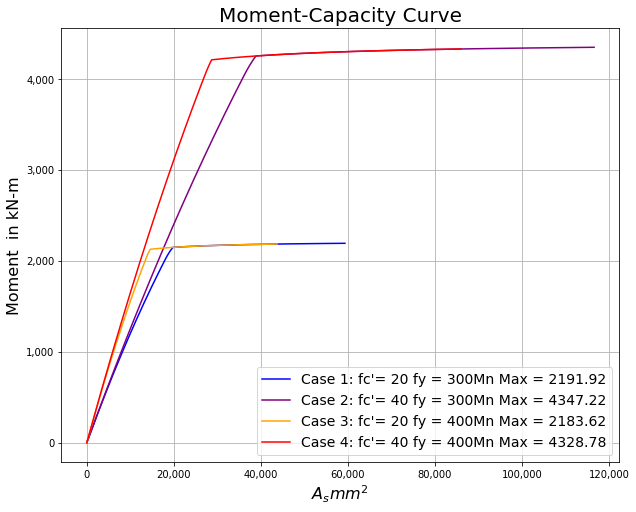

In [3]:
# Plot the curves
plt.figure(figsize=(10,8))
plt.title("Moment-Capacity Curve", fontsize=20)
plt.xlabel(r'$A_s mm^2$', fontsize=16)
plt.ylabel('Moment  in kN-m', fontsize=16)
plt.grid()

# Plot the converted values
case1, = plt.plot(As[0], M[0], label='Case 1: fc\'= '+ str(fcPrime[0]) + ' fy = ' +\
                  str(fy[0]) + 'Mn Max = ' + str(round(MnMax[0]/1000**2,2)), color='blue')
case2, = plt.plot(As[1], M[1], label='Case 2: fc\'= '+ str(fcPrime[1]) + ' fy = ' +\
                  str(fy[1]) + 'Mn Max = ' + str(round(MnMax[1]/1000**2,2)), color='purple')
case3, = plt.plot(As[2], M[2], label='Case 3: fc\'= '+ str(fcPrime[2]) + ' fy = ' +\
                  str(fy[2]) + 'Mn Max = ' + str(round(MnMax[2]/1000**2,2)), color='orange')
case4, = plt.plot(As[3], M[3], label='Case 4: fc\'= '+ str(fcPrime[3]) + ' fy = ' +\
                  str(fy[3]) + 'Mn Max = ' + str(round(MnMax[3]/1000**2,2)), color='red')

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_formatter = tkr.FuncFormatter(func)
x_formatter = tkr.FuncFormatter(func)

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(y_formatter)
ax.xaxis.set_major_formatter(x_formatter)

plt.legend(handles=[case1, case2, case3, case4], loc='best', fontsize=14)
plt.show()